# Bike Rental Prediction

In [1465]:
# Load the required libraries for analysis of data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1466]:
# Load the data
Bike_Data = pd.read_csv("day.csv")

Bike_Data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# Explore the data

In [1467]:
# Check the dimensions(no of rows and no of columns)
Bike_Data.shape

(731, 16)

In [1468]:
# Checking columns and its data types

Bike_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [1469]:
# Check names of dataset
Bike_Data.columns

# Rename variables in dataset
Bike_Data = Bike_Data.rename(columns = {'instant':'index','dteday':'date','yr':'year','mnth':'month','weathersit':'weather',
                                        'temp':'temperature','hum':'humidity','cnt':'count'})

Bike_Data.columns


Index(['index', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [1470]:
#lets see first five observations of our data
Bike_Data.head()

,index,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1471]:
# lets see last five observations of our data
Bike_Data.tail()

,index,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
726,727,27-12-2012,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
730,731,31-12-2012,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [1472]:
# Lets see the datatypes of the given data
Bike_Data.dtypes

index            int64
date            object
season           int64
year             int64
month            int64
holiday          int64
weekday          int64
workingday       int64
weather          int64
temperature    float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [1473]:
# lets Check summary of the dataset 
Bike_Data.describe()

,index,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1474]:
# Variable Identification 
Bike_Data['count'].dtypes

dtype('int64')

In [1475]:
#lets drop some variables because it doesnot carry any useful information

Bike_Data = Bike_Data.drop(['casual','registered','index','date'],axis=1)

# Lets check dimensions of data after removing some variables
Bike_Data.shape

(731, 12)

In [1476]:
#lets see first five observations of our data after removing columns
Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1477]:
# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

# EDA or Data Preprocessing

## Missing value Analysis

In [1478]:
# Missing Value anlysis

# to check if there is any missing values
Missing_val = Bike_Data.isnull().sum()
Missing_val
# In our dataset we dont have any missing values.so that we dont need to do any imputation methods 

season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
count          0
dtype: int64

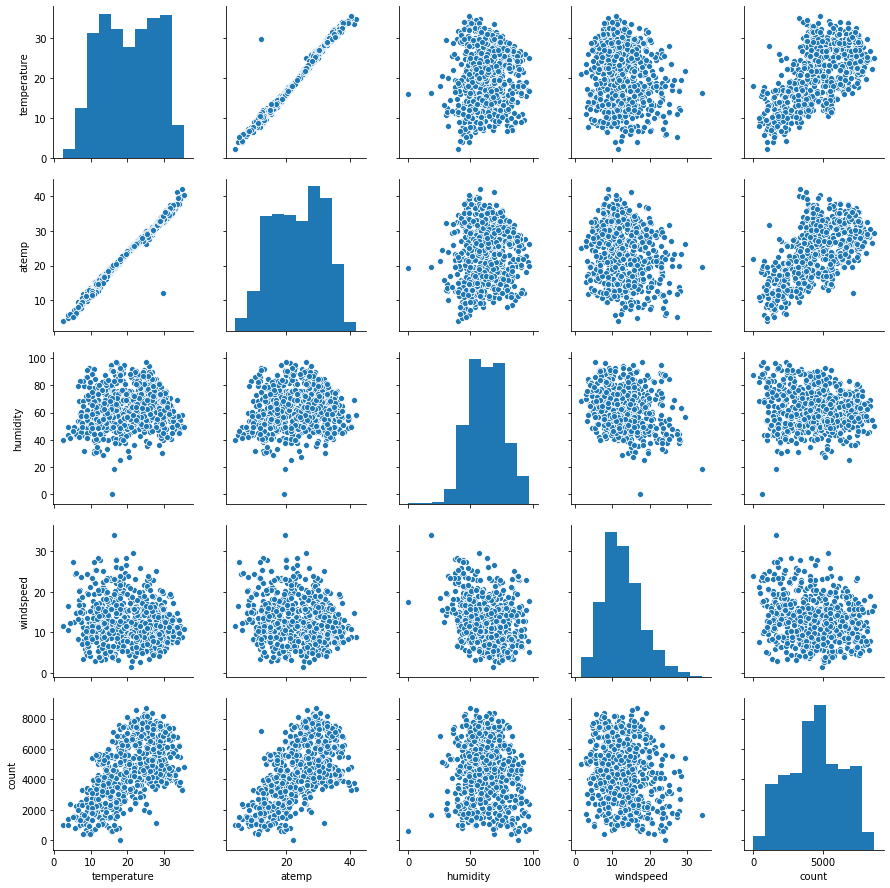

In [1479]:
#Visualising Numerical data using Pairplot
sns.pairplot(Bike_Data[cnames])
plt.show()

## temperature and atemp have correlation

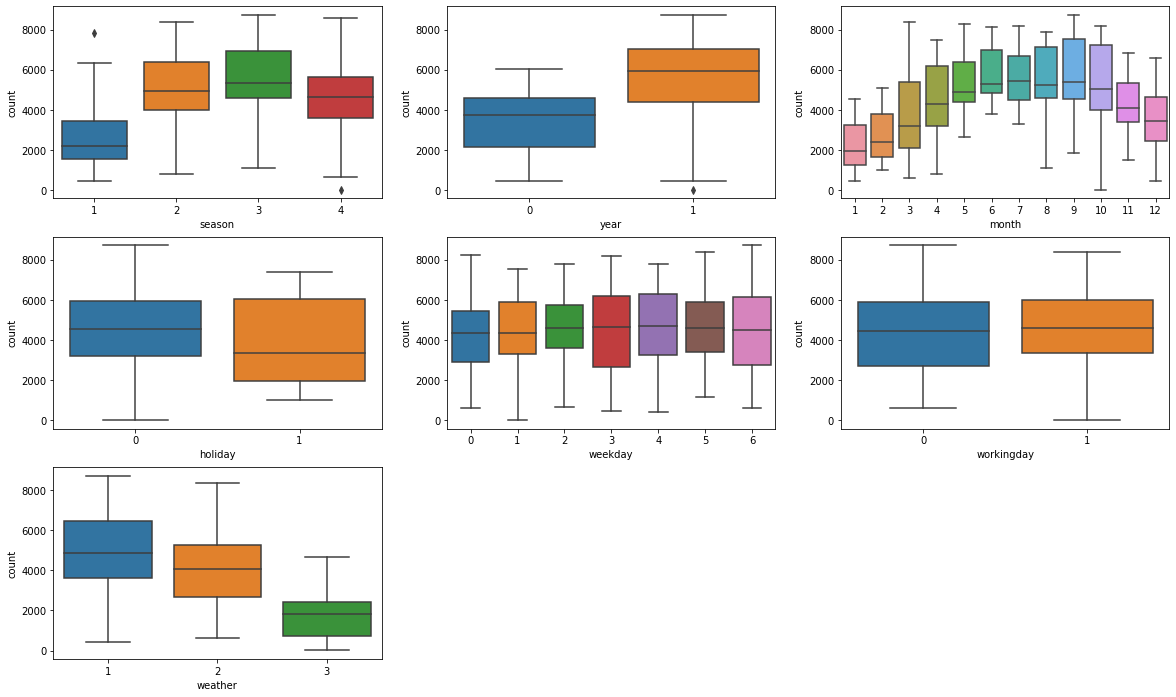

In [1480]:
#Visualising categorical data using Boxplot 

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = Bike_Data)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = Bike_Data)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = Bike_Data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = Bike_Data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = Bike_Data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = Bike_Data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weather', y = 'count', data = Bike_Data)
plt.show()


### Inferences from EDA
Seasons:
- In Summer the count is very low.
- In Spring and Fall the counts are better than Summer
- In Winter the counts are better than Summer but not as good as Spring and Fall

Year:
- The counts of 2019 are better as compared to 2018

Month:
- The count variable is the least in Jan and increases in the middle months (Mar-Oct) and then reduces slightly in Nov and Dec

Holiday:
- The mean count is higher in non Holiday as compared to holiday

Weekday and Workday:
- The mean count is almost the same in weekday and workday

Weather:
- Cnt is maximum when weather is good and its minimum weather is bab.

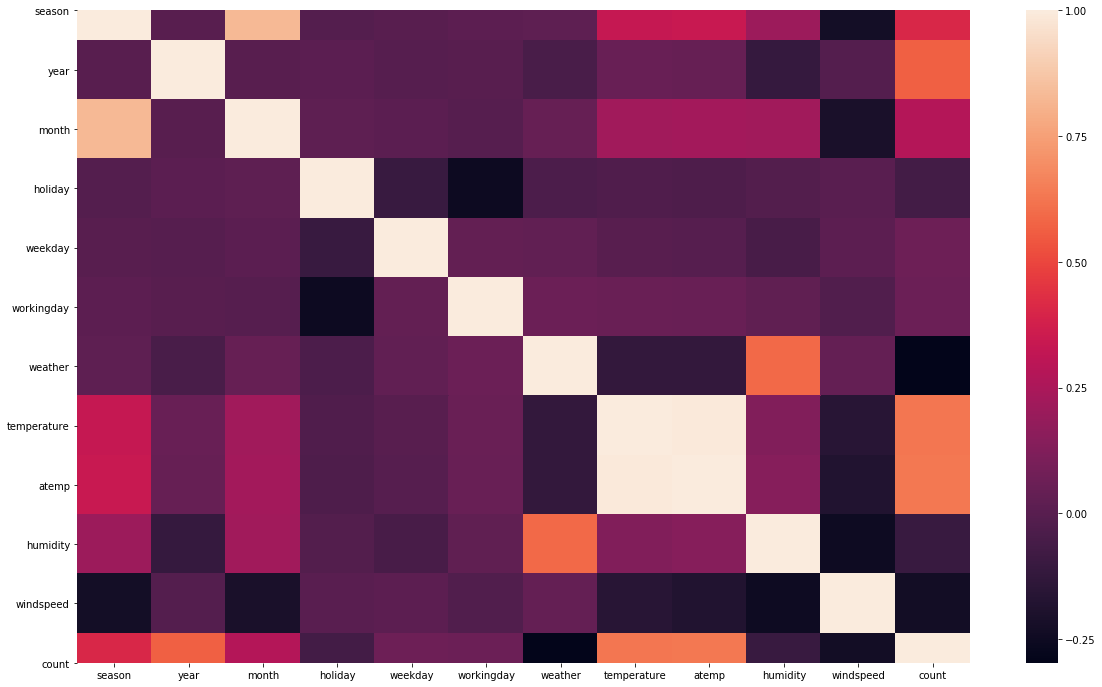

In [1481]:
## Plotting Heatmap to find corelation between columns

plt.figure(figsize=(20, 12))
corrmat = Bike_Data.corr()
sns.heatmap(corrmat)

## We notice that temperature and atemp columns are highly positvely correlated

## Correlation Analysis

In [1482]:
churn_corr = Bike_Data.corr()
cmap = cmap=sns.diverging_palette(15, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

churn_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '90px', 'font-size': '15pt'})\
    .set_caption("Correlation matrix")\
    .set_precision(2)\
    .set_table_styles(magnify())

#Finding of correlation analysis -

#temperature and atemp are highly correlated.
#temperature and atemp have positive and strong coorelation with cnt.
#humidity and windspeed have negative and weak correlation with cnt.

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
season,1,-0.0018,0.83,-0.011,-0.0031,0.012,0.019,0.33,0.34,0.21,-0.23,0.41
year,-0.0018,1,-0.0018,0.008,-0.0055,-0.002,-0.049,0.048,0.046,-0.11,-0.012,0.57
month,0.83,-0.0018,1,0.019,0.0095,-0.0059,0.044,0.22,0.23,0.22,-0.21,0.28
holiday,-0.011,0.008,0.019,1,-0.1,-0.25,-0.035,-0.029,-0.033,-0.016,0.0063,-0.068
weekday,-0.0031,-0.0055,0.0095,-0.1,1,0.036,0.031,-0.00017,-0.0075,-0.052,0.014,0.067
workingday,0.012,-0.002,-0.0059,-0.25,0.036,1,0.061,0.053,0.052,0.024,-0.019,0.061
weather,0.019,-0.049,0.044,-0.035,0.031,0.061,1,-0.12,-0.12,0.59,0.04,-0.3
temperature,0.33,0.048,0.22,-0.029,-0.00017,0.053,-0.12,1,0.99,0.13,-0.16,0.63
atemp,0.34,0.046,0.23,-0.033,-0.0075,0.052,-0.12,0.99,1,0.14,-0.18,0.63
humidity,0.21,-0.11,0.22,-0.016,-0.052,0.024,0.59,0.13,0.14,1,-0.25,-0.1


## Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac2a553b08>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac2a536dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac2a5598c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2ac2a561fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ac2a561088>],
 'means': []}

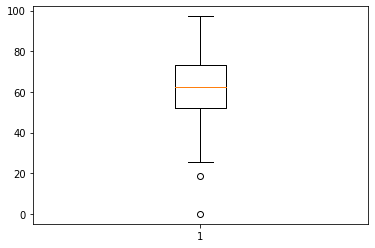

In [1483]:
plt.boxplot(Bike_Data['humidity'])

#Negetive outlier found in hum

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac2a5a9488>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac2a5a9f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac2a5a2908>],
 'medians': [<matplotlib.lines.Line2D at 0x2ac2a599588>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ac2a588fc8>],
 'means': []}

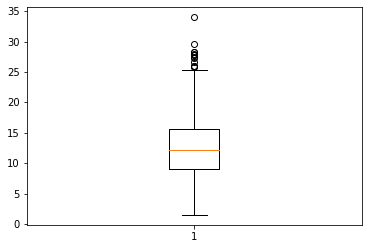

In [1484]:
%matplotlib inline
plt.boxplot(Bike_Data['windspeed'])

#Positive outliers found in windspeed

{'whiskers': [<matplotlib.lines.Line2D at 0x2ac2a5c3688>,
 'caps': [<matplotlib.lines.Line2D at 0x2ac2a5c3f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ac2a5e1b08>],
 'medians': [<matplotlib.lines.Line2D at 0x2ac2a5c0e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ac2a5cbd48>],
 'means': []}

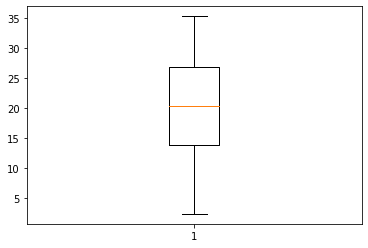

In [1485]:
%matplotlib inline
plt.boxplot(Bike_Data['temperature'])

#Negative outliers found in temperature

In [1486]:
# Lets detect and remove outliers
for i in cnames:
    print(i)
    # Quartiles and IQR
    q25,q75 = np.percentile(Bike_Data[i],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    Minimum = q25 - (1.5 * IQR)
    print(Minimum)
    Maximum = q75 + (1.5 * IQR)
    print(Maximum)
    
    Minimum = Bike_Data.loc[Bike_Data[i] < Minimum ,i] 
    Maximum = Bike_Data.loc[Bike_Data[i] > Maximum ,i]

#we substituted minimum values for inliers and maximum values for outliers.
#from that we removed all the outliers.   

temperature
-5.757056000000002
46.449556
atemp
-3.4148374999999973
50.73706249999999
humidity
20.468725000000006
104.55212499999999
windspeed
-0.8339322499999984
25.50095375
count
-1054.0
10162.0


In [1487]:
#converting categorical variables to object datatype

for var in cat_cnames:
    Bike_Data[var] = Bike_Data[var].astype("object")
    
Bike_Data.dtypes


season          object
year            object
month           object
holiday         object
weekday         object
workingday      object
weather         object
temperature    float64
atemp          float64
humidity       float64
windspeed      float64
count            int64
dtype: object

## Dummy Variables

- Create dummy variables for season, month, weekday, weather

In [1488]:
# Let's drop the first column (spring)  from season_dummy df using 'drop_first = True'

season_dummy = pd.get_dummies(Bike_Data['season'], drop_first = True)

season_dummy.head()

#Spring - 000
#Summer - 100
#Fall   - 010
#Winter - 001

# Add the results to the original Bike_Data dataframe

Bike_Data = pd.concat([Bike_Data, season_dummy], axis = 1)

In [1489]:
# Rename column 2, 3 ,4 

Bike_Data.rename(columns = {2:'summer',3:'fall',4:'winter'}, inplace = True) 

Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [1490]:
# Let's drop the first column (year 2018)  from season_dummy df using 'drop_first = True'

year_dummy = pd.get_dummies(Bike_Data['year'], drop_first = False)

year_dummy.head()



,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [1491]:
# Add the results to the original Bike_Data dataframe

Bike_Data = pd.concat([Bike_Data, year_dummy], axis = 1)

In [1492]:
# Rename column 0:'year_2018',1:'year_2019'

Bike_Data.rename(columns = {0:'year_2018',1:'year_2019'}, inplace = True) 

Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count,summer,fall,winter,year_2018,year_2019
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0


In [1493]:
# create dummy variable for Month column

month_dummy = pd.get_dummies(Bike_Data['month'], drop_first = True)

month_dummy.head()

# Jan- 00000000000
# Feb- 10000000000
# Mar- 01000000000
# Apr- 00100000000
# May- 00010000000
# Jun- 00001000000
# Jul- 00000100000
# Aug- 00000010000
# Sep- 00000001000
# Oct- 00000000100
# Nov- 00000000010
# Dec- 00000000001

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [1494]:
# Add the results to the original Bike_Data dataframe

Bike_Data = pd.concat([Bike_Data, month_dummy], axis = 1)

Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,...,3,4,5,6,7,8,9,10,11,12
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [1495]:
# Rename column

Bike_Data.rename(columns = {2:'feb',3:'mar',4:'apr',5:'may', 6:'jun', 7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}, inplace = True) 

Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [1496]:
# Create dummy variables for weekday column

week_dummy = pd.get_dummies(Bike_Data['weekday'], drop_first = True)

week_dummy.head()

# 0 -000000
# 1- 100000
# 2- 010000
# 3- 001000
# 4- 000100
# 5- 000010
# 6- 000001


,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [1497]:
# Add the results to the original Bike_Data dataframe

Bike_Data = pd.concat([Bike_Data, week_dummy], axis = 1)

Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,...,sep,oct,nov,dec,1,2,3,4,5,6
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [1498]:
# Rename column

Bike_Data.rename(columns = {1:'mon',2:'tue',3:'wed',4:'thr',5:'fri', 6:'sat'}, inplace = True) 

Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,...,sep,oct,nov,dec,mon,tue,wed,thr,fri,sat
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [1499]:
#Since weather = 1 is important column it should not be dropped hence drop_first is set to False

weather_dummy = pd.get_dummies(Bike_Data['weather'], drop_first = False)

weather_dummy.head()


# weather_1- 100
# weather_2- 010
# weather_3- 001


,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1500]:
# Add the results to the original Bike_Data dataframe

Bike_Data = pd.concat([Bike_Data, weather_dummy], axis = 1)

Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,...,dec,mon,tue,wed,thr,fri,sat,1,2,3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,1,0,0


In [1501]:
# Rename column

Bike_Data.rename(columns = {1:'weather_1',2:'weather_2',3:'weather_3'}, inplace = True) 

Bike_Data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,...,dec,mon,tue,wed,thr,fri,sat,weather_1,weather_2,weather_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,1,0,0


In [1502]:
Bike_Data.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temperature', 'atemp', 'humidity', 'windspeed', 'count',
       'summer', 'fall', 'winter', 'year_2018', 'year_2019', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'mon',
       'tue', 'wed', 'thr', 'fri', 'sat', 'weather_1', 'weather_2',
       'weather_3'],
      dtype='object')

In [1503]:
Bike_Data.shape

## number of columns is now 37 after creating the dummy variables

(731, 37)

In [1504]:
#Dropping columns after creating dummy variables

Bike_Data.drop(['weather'], axis = 1, inplace = True)
Bike_Data.drop(['month'], axis = 1, inplace = True)
Bike_Data.drop(['season'], axis = 1, inplace = True)
Bike_Data.drop(['weekday'], axis = 1, inplace = True)
Bike_Data.drop(['year'], axis = 1, inplace = True)

In [1505]:
Bike_Data.shape

## number of columns is now 32 after deleting columns creating the dummy variables

(731, 32)

## Splitting the Data into Training and Testing Sets

In [1506]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Bike_Data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1507]:
from sklearn.preprocessing import MinMaxScaler

In [1508]:
# Using MinMax Scaling to scale values

scaler = MinMaxScaler()

In [1509]:
# Apply scaler() to all the columns except the 'categorical' and 'dummy' variables
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

df_train[cnames] = scaler.fit_transform(df_train[cnames])

C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [1510]:
df_train.head()

,holiday,workingday,temperature,atemp,humidity,windspeed,count,summer,fall,winter,...,dec,mon,tue,wed,thr,fri,sat,weather_1,weather_2,weather_3
576,0,1,0.836974,0.795348,0.689137,0.239301,0.814887,0,1,0,...,0,1,0,0,0,0,0,1,0,0
426,0,1,0.366591,0.368552,0.677114,0.220569,0.364933,0,0,0,...,0,0,0,0,0,1,0,0,1,0
729,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,1,0,0,0,0,0,0,1,0,0
482,0,1,0.496388,0.490358,0.413052,0.656397,0.714565,1,0,0,...,0,0,0,0,0,1,0,1,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [1511]:
df_train.describe()

,temperature,atemp,humidity,windspeed,count,summer,fall,winter,year_2018,year_2019,...,dec,mon,tue,wed,thr,fri,sat,weather_1,weather_2,weather_3
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.536606,0.512443,0.648573,0.317963,0.515061,0.246575,0.260274,0.248532,0.491194,0.508806,...,0.084149,0.135029,0.146771,0.140900,0.133072,0.135029,0.156556,0.624266,0.348337,0.027397
std,0.227231,0.213364,0.148691,0.165339,0.225338,0.431440,0.439214,0.432585,0.500412,0.500412,...,0.277883,0.342090,0.354224,0.348259,0.339986,0.342090,0.363738,0.484786,0.476910,0.163398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.338036,0.332910,0.534994,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530654,0.516885,0.653499,0.294121,0.519903,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.684716,0.755689,0.406058,0.691498,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


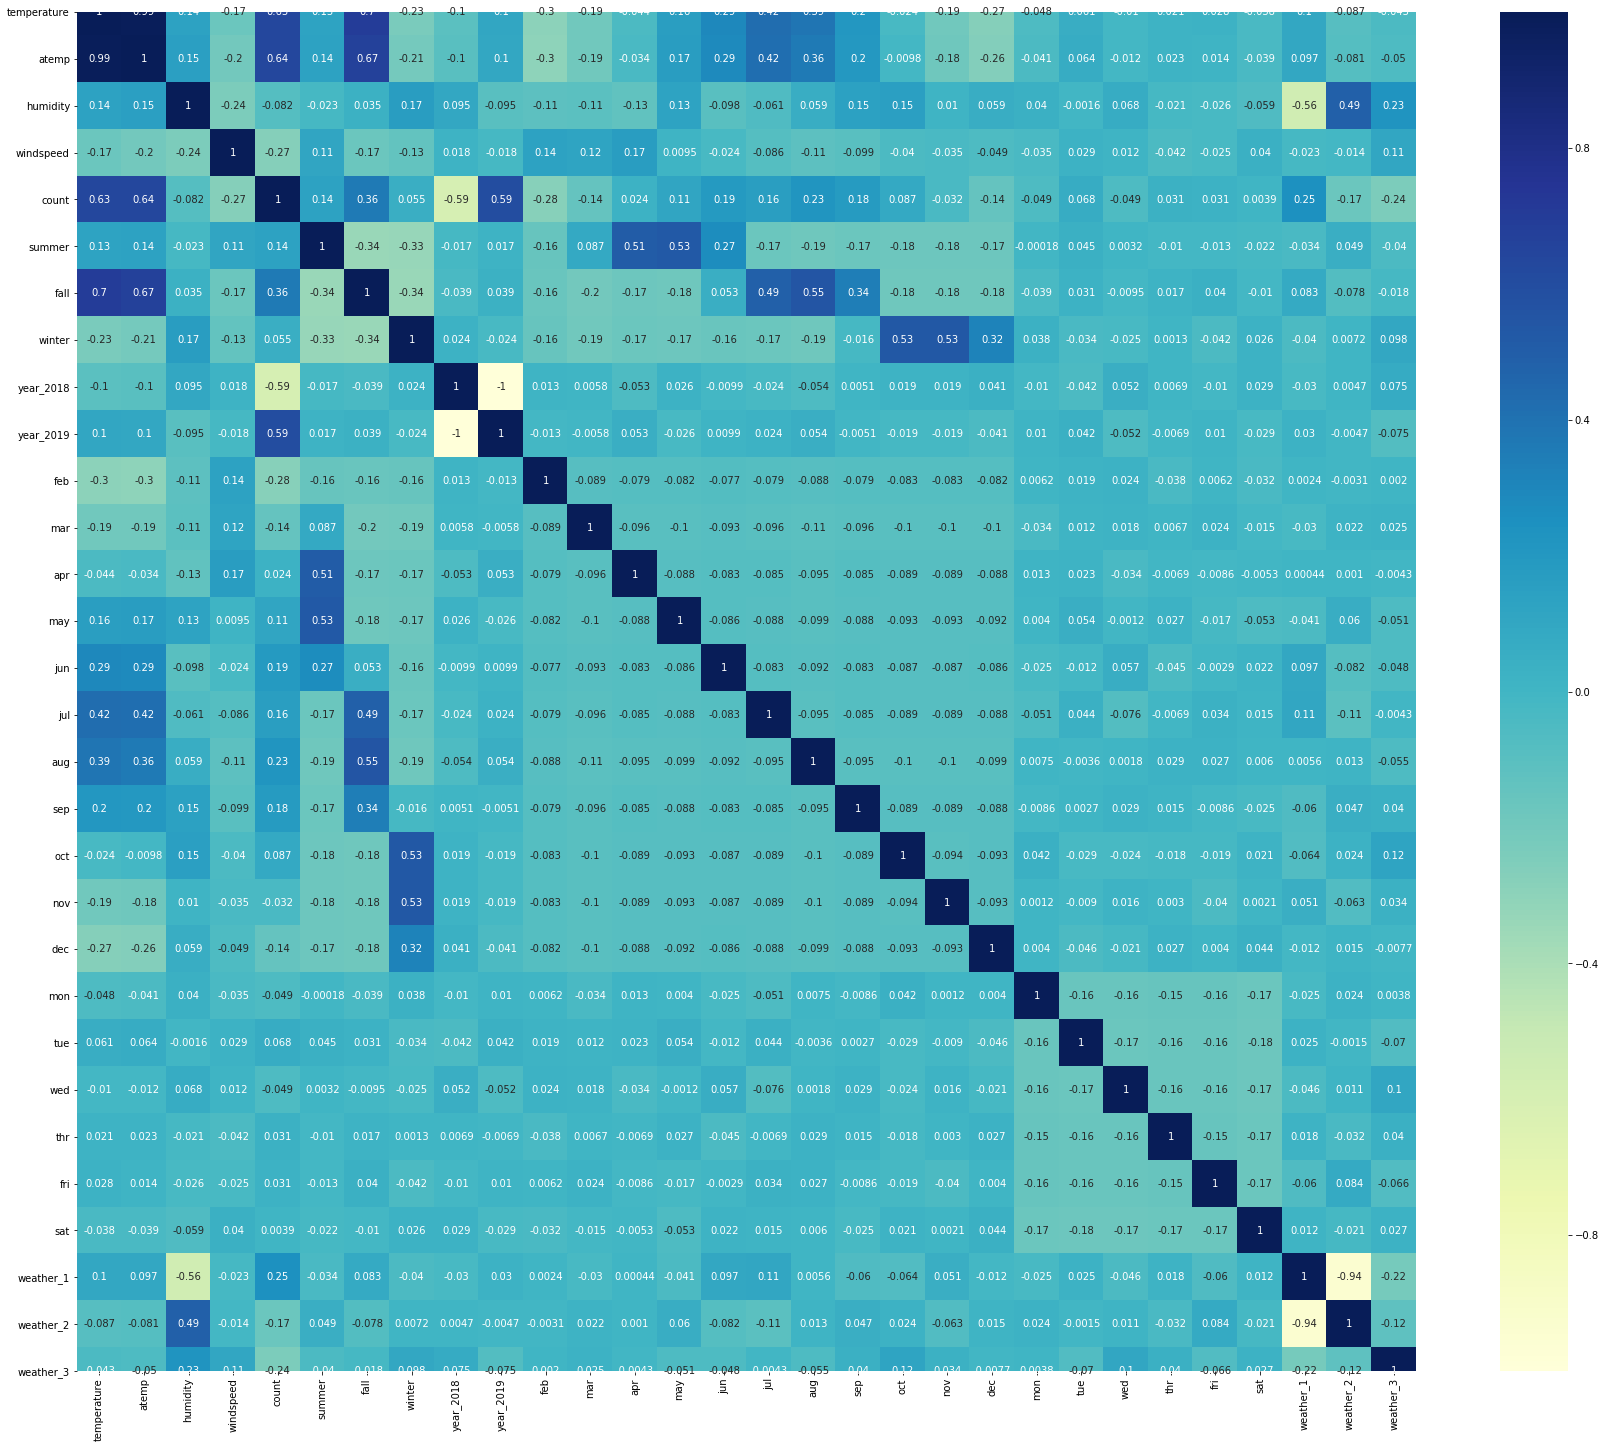

In [1512]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing into X and Y sets for the model building

In [1513]:
# Removing the count target variable for Regression

y_train = df_train.pop('count')
X_train = df_train

## RFE

In [1514]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1515]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1516]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', False, 12),
 ('workingday', False, 6),
 ('temperature', True, 1),
 ('atemp', False, 16),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('year_2018', True, 1),
 ('year_2019', True, 1),
 ('feb', False, 8),
 ('mar', True, 1),
 ('apr', False, 3),
 ('may', True, 1),
 ('jun', False, 2),
 ('jul', False, 11),
 ('aug', True, 1),
 ('sep', True, 1),
 ('oct', True, 1),
 ('nov', False, 9),
 ('dec', False, 10),
 ('mon', False, 7),
 ('tue', False, 17),
 ('wed', False, 15),
 ('thr', False, 13),
 ('fri', False, 14),
 ('sat', False, 5),
 ('weather_1', True, 1),
 ('weather_2', False, 4),
 ('weather_3', True, 1)]

In [1517]:
col = X_train.columns[rfe.support_]
col

Index(['temperature', 'humidity', 'windspeed', 'summer', 'fall', 'winter',
       'year_2018', 'year_2019', 'mar', 'may', 'aug', 'sep', 'oct',
       'weather_1', 'weather_3'],
      dtype='object')

In [1518]:
X_train.columns[~rfe.support_]

#removing the non necessary colmuns

Index(['holiday', 'workingday', 'atemp', 'feb', 'apr', 'jun', 'jul', 'nov',
       'dec', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat', 'weather_2'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [1519]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1520]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1521]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1522]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.51e-192
Time:                        21:49:03   Log-Likelihood:                 516.80
No. Observations:                 511   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2081      0.021      9.967      

In [1523]:
# Calculate the VIFs for the new model
X_train_new = X_train_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.astype('float')
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,year_2019,31.97
6,year_2018,31.85
4,fall,6.33
0,temperature,3.76
3,summer,2.79
5,winter,2.38
1,humidity,1.92
10,aug,1.68
13,weather_1,1.64
9,may,1.54


In [1524]:
# Using p value, R-square and Adj R - squared to remove variables. 2018 has high p value and hence is dropped
X_train_rfe = X_train_rfe.drop(["year_2018"], axis = 1)


In [1525]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1526]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1527]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.51e-192
Time:                        21:49:03   Log-Likelihood:                 516.80
No. Observations:                 511   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1957      0.032      6.150      

In [1528]:
# Using p value, R-square and Adj R - squared to remove variables. May has high p value and hence is dropped
X_train_rfe = X_train_rfe.drop(["may"], axis = 1)


In [1529]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1530]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1531]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.36e-192
Time:                        21:49:04   Log-Likelihood:                 514.69
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1875      0.032      5.923      

In [1532]:
# Using p value, R-square and Adj R - squared to remove variables. Mar has high p value and hence is dropped
X_train_rfe = X_train_rfe.drop(["mar"], axis = 1)


In [1533]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1534]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1535]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     224.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.42e-192
Time:                        21:49:04   Log-Likelihood:                 511.86
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     498   BIC:                            -942.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1995      0.031      6.355      

In [1536]:
# Using p value, R-square and Adj R - squared to remove variables. Fall has high p value and hence is dropped
X_train_rfe = X_train_rfe.drop(["fall"], axis = 1)


In [1537]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1538]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1539]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.48e-192
Time:                        21:49:04   Log-Likelihood:                 509.34
No. Observations:                 511   AIC:                            -994.7
Df Residuals:                     499   BIC:                            -943.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2003      0.032      6.354      

In [1540]:
# Calculate the VIFs for the new model
X_train_new = X_train_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.astype('float')
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,10.12
1,humidity,10.07
2,windspeed,3.98
9,weather_1,2.75
4,winter,2.30
5,year_2019,2.02
3,summer,1.82
8,oct,1.61
6,aug,1.60
7,sep,1.33


In [1541]:
# Using p value, R-square and Adj R - squared to remove variables. Since Humidity has VIF and hence is dropped
X_train_rfe = X_train_rfe.drop(["humidity"], axis = 1)


In [1542]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1543]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1544]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.52e-187
Time:                        21:49:04   Log-Likelihood:                 494.63
No. Observations:                 511   AIC:                            -967.3
Df Residuals:                     500   BIC:                            -920.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0542      0.017      3.197      

In [1545]:
# Calculate the VIFs for the new model
X_train_new = X_train_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.astype('float')
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,6.20
1,windspeed,3.21
8,weather_1,2.69
4,year_2019,2.00
3,winter,1.92
2,summer,1.80
5,aug,1.60
7,oct,1.60
6,sep,1.33
9,weather_3,1.12


In [1546]:
# Using p value, R-square and Adj R - squared to remove variables. Since temperature is highly correlated hence cannot be dropped hence dropping windspeed to reduce temperature's VIF and hence is dropped
X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)


In [1547]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1548]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1549]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.36e-180
Time:                        21:49:04   Log-Likelihood:                 475.30
No. Observations:                 511   AIC:                            -930.6
Df Residuals:                     501   BIC:                            -888.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0112      0.014     -0.806      

In [1550]:
# Calculate the VIFs for the new model
X_train_new = X_train_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.astype('float')
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,5.43
7,weather_1,2.54
3,year_2019,1.95
2,winter,1.90
1,summer,1.76
6,oct,1.60
4,aug,1.59
5,sep,1.32
8,weather_3,1.08


In [1551]:
# Using p value, R-square and Adj R - squared to remove variables. Removing weather_1 to reduce temperature VIF
X_train_rfe = X_train_rfe.drop(["weather_1"], axis = 1)


In [1552]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1553]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1554]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     240.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.48e-166
Time:                        21:49:04   Log-Likelihood:                 439.42
No. Observations:                 511   AIC:                            -860.8
Df Residuals:                     502   BIC:                            -822.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0303      0.014      2.175      

In [1555]:
# Calculate the VIFs for the new model
X_train_new = X_train_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.astype('float')
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,3.85
3,year_2019,1.93
2,winter,1.86
1,summer,1.76
6,oct,1.58
4,aug,1.55
5,sep,1.30
7,weather_3,1.05


In [1556]:
# Using p value, R-square and Adj R - squared to remove variables. Remove oct due to high p value
X_train_rfe = X_train_rfe.drop(["oct"], axis = 1)


In [1557]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1558]:
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()   # Running the linear model

In [1559]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     273.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.87e-167
Time:                        21:49:04   Log-Likelihood:                 438.18
No. Observations:                 511   AIC:                            -860.4
Df Residuals:                     503   BIC:                            -826.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0277      0.014      1.999      

In [1560]:
# Calculate the VIFs for the new model
X_train_new = X_train_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.astype('float')
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,3.78
3,year_2019,1.93
1,summer,1.74
4,aug,1.55
2,winter,1.40
5,sep,1.27
6,weather_3,1.04


## Residual Analysis of the train data

In [1561]:
y_train_count = lm.predict(X_train_rfe)

In [1562]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

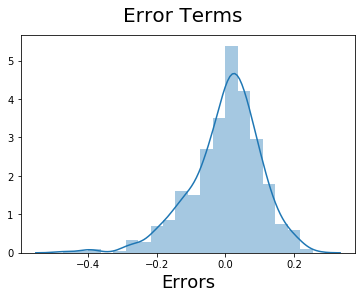

In [1563]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#Error terms are normally distributed

## Making Predictions

In [1564]:
#Applying the scaling on the test sets

cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

df_test[cnames] = scaler.transform(df_test[cnames])

C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Dividing into X_test and y_test

In [1565]:
#Dividing the test dataset
y_test = df_test.pop('count')
X_test = df_test

In [1566]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [1567]:
# Now let's use our model to make predictions.



# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1568]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

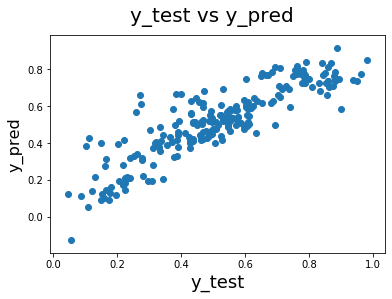

In [1569]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Check Adjusted R - square for both Train and Test Data

In [1570]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [1571]:
# Model prediction on  train data



# Model prediction on test data
LinearRegression_test= lm.predict(X_test_new)

# r2 value for train data
r2_train= r2_score(y_train,LinearRegression_train)

# r2 value for test data-
r2_test=r2_score(y_pred,LinearRegression_test)


# Calculated above
print("R^2_score for test data=0.792")
print("R^2_score for train data="+str(r2_train))




R^2_score for test data=0.792
R^2_score for train data=0.7920778973894704
